# <font color='blue'> MSiA 422 Project 1
## Written by Parth Patel

### IMPORTS

In [3]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

## <font color='orange'> Exercise 1

In [19]:
path = 'namesbystate' # needs to be updated for anyone who uses this code
all_files = glob.glob(os.path.join(path, "*.txt"))

dframes = []
for item in all_files:
    df = pd.read_csv(item,header=None,names=['State','Gender','birth_year','first_name','name_count'])
    dframes.append(df)

combined_df = pd.concat(dframes, axis=0, ignore_index=True)

In [11]:
class BabyNames:
    '''
    FILL OUT DOCSTRING BB
    '''
    #part 2a
    def __init__(self,path):
        all_files = glob.glob(os.path.join(path, "*.txt"))
        dframes = []
        for item in all_files:
            data = pd.read_csv(item,header=None,names=['State','Gender','birth_year','first_name','name_count'])
            dframes.append(data)
        self.df = pd.concat(dframes, axis=0, ignore_index=True)
        
    #part 2b
    def Count(self,state=None,year=None):
        if ((state!=None)&(year!=None)):
            out_df = self.df[(self.df.State==state.upper())&(self.df.birth_year == year)]
        
        elif ((state==None)&(year!=None)):
            out_df = self.df[self.df.birth_year == year]
        
        else:
            out_df = self.df
            
        if out_df.empty:
            print("There were no results for this combination of inputs. There may have been an error with your inputs. Please provide two letter abbrev for states in form of a string and the year as a 4 digit integer. Not providing an arg for either or both is acceptable as well.")
        else:
            print('Total number of births for this combination of inputs:(state: {}, year: {}):'.format(state,year))
            return sum(out_df['name_count'])
        
    #part 2c:
    def Top10BabyNames(self,state=None,year=None):
        
        self.rank_df = pd.DataFrame()
        self.rank_df['Rank'] = list(range(1,11))
        
        if ((state!=None)&(year!=None)):
            tmp_df = self.df[(self.df.State==state.upper())&(self.df.birth_year == year)]
            tmp_df = tmp_df.groupby(['Gender','first_name']).agg({'name_count':'sum'}).reset_index()
            self.rank_df['Male'] = tmp_df[tmp_df['Gender']=='M'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
            self.rank_df['Female'] = tmp_df[tmp_df['Gender']=='F'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
        
        
        elif ((state==None)&(year!=None)):
            tmp_df = self.df[self.df.birth_year == year]
            tmp_df = tmp_df.groupby(['Gender','first_name']).agg({'name_count':'sum'}).reset_index()
            self.rank_df['Male'] = tmp_df[tmp_df['Gender']=='M'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
            self.rank_df['Female'] = tmp_df[tmp_df['Gender']=='F'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
        else:
            tmp_df = self.df
            tmp_df = tmp_df.groupby(['first_name','Gender']).sum().reset_index()
            self.rank_df['Male'] = tmp_df[tmp_df['Gender']=='M'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
            self.rank_df['Female'] = tmp_df[tmp_df['Gender']=='F'].sort_values(by='name_count',ascending=False).reset_index()[:10]['first_name']
        
        if self.rank_df.empty:
            print("There were no results for this combination of inputs (state: {}, year: {}). There may have been an error with your inputs. Please provide two letter abbrev for states in form of a string and the year as a 4 digit integer. Not providing an arg for either or both is acceptable as well.".format(state,year))
        else:
            print('Top 10 male & female names for this combination of inputs (state: {}, year: {}):'.format(state,year))
            return self.rank_df
        
    #part 2d:
    def ChangeOfPopularity(self,fromYear, toYear, top):
        fromYr_df = self.df[self.df.birth_year == fromYear].groupby(['first_name']).agg({'name_count':'sum'})
        toYr_df = self.df[self.df.birth_year == toYear].groupby(['first_name']).agg({'name_count':'sum'})
        self.popularity_df = pd.merge(fromYr_df,toYr_df,how='outer',on='first_name').fillna(0)
        self.popularity_df['pop_change'] = self.popularity_df['name_count_x']- self.popularity_df['name_count_y']
        self.popularity_df['pop_change'] = self.popularity_df['pop_change'].astype(int)
        self.popularity_df.sort_values(by='pop_change',ascending=False,inplace=True)
        self.popularity_df.reset_index(inplace=True)
        self.pop_inc = self.popularity_df[:top][['first_name','pop_change']]
        self.pop_dec = self.popularity_df[-top:][['first_name','pop_change']].sort_values(by='pop_change')
        self.pop_same = self.popularity_df[self.popularity_df['pop_change']==0]['first_name']
        
        return print("Names that increased in popularity:\n", self.pop_inc,"\n Names that decreased in popularity:\n",
                     self.pop_dec,"\n Names that remained constant in popularity:\n",self.pop_same)
        
        
    #part 2e:
    def Top5NamesPerYear(self,year,sex):            
        tmp_df = self.df[(self.df.birth_year == year)&(self.df.Gender == sex)]
        tmp_df = tmp_df.sort_values(by='name_count',ascending = False)
        tmp_df_grpd = tmp_df.groupby('State').head(5)
        tmp_df_grpd.sort_values(by=['State','name_count'],ascending=[True,False])
        tmp_df_grpd['rank'] = tmp_df_grpd.groupby("State")["name_count"].rank("first", ascending=False)
        df_tmp_final = tmp_df_grpd.pivot_table(index='State',columns=['rank'],values=['name_count','first_name'],aggfunc='first')
        
        self.top5df = pd.DataFrame(index=df_tmp_final.index)
        for i in list(range(1,6)):
            self.top5df['Rank {}'.format(i)] = df_tmp_final['first_name'][i]
            self.top5df['Num for Rank {}'.format(i)] = df_tmp_final['name_count'][i]
        
        return self.top5df
    
    #part 2f:
    def NamePopularityPlot(self,name, yearRange, state,sex):
        
#         if sex[0].upper == 'M':
#             sex = "M"
#         else:
#             sex = "F"
        
        tmp_df = self.df[(self.df['first_name'] == name)&(self.df['birth_year'].isin(list(range(yearRange[0],yearRange[1]))))&(self.df['State'] == state)&(self.df['Gender']==sex)]
        tmp_df_full = self.df[(self.df['birth_year'].isin(list(range(yearRange[0],yearRange[1]))))&(self.df['State'] == state)&(self.df['Gender']==sex)]
        tmp_df_full.rename(columns={"name_count":"total_count"},inplace=True)
        tmp_df_full_grpd = tmp_df_full.groupby('birth_year').agg({'total_count':'sum'}).reset_index()

        self.name_pop_df = pd.merge(tmp_df,tmp_df_full_grpd,how = 'inner',on='birth_year')
        self.name_pop_df['pop_proportion'] = 100*(self.name_pop_df.name_count/self.name_pop_df.total_count)
        
        ax=self.name_pop_df.plot('birth_year','pop_proportion',kind='scatter',figsize=(12,10))
        ax.set(xlabel = 'Year',ylabel= 'Count of Babies Named {}/Total Number of Babies Born in the Year'.format(name))
        ax.set(title = 'Name Popularity Plot')
        
        return self.name_pop_df
    
    #part 2g
    def NameFlip(n=10):
        return n

In [12]:
baby = BabyNames('namesbystate')

In [13]:
baby.Count(state='NY',year=2000)

Total number of births for this combination of inputs:(state: NY, year: 2000):


214844

In [14]:
baby.Top10BabyNames(year=2000)

Top 10 male & female names for this combination of inputs (state: None, year: 2000):


,Rank,Male,Female
0,1,Jacob,Emily
1,2,Michael,Hannah
2,3,Matthew,Madison
3,4,Joshua,Ashley
4,5,Christopher,Sarah
5,6,Nicholas,Alexis
6,7,Andrew,Samantha
7,8,Joseph,Jessica
8,9,Daniel,Elizabeth
9,10,Tyler,Taylor


In [15]:
baby.ChangeOfPopularity(2015,2016,10)

Names that increased in popularity:
   first_name  pop_change
0      Logan        1654
1     Jayden        1490
2      Jacob        1464
3      Mason        1383
4     Sophia        1290
5      Alexa        1276
6      Ethan        1263
7      Aiden        1247
8  Alexander        1143
9    Madison        1106 
 Names that decreased in popularity:
       first_name  pop_change
11100    Adeline       -1709
11099  Charlotte       -1690
11098      Mateo       -1535
11097     Oliver       -1376
11096     Bryson       -1249
11095    Lincoln       -1128
11094      Riley       -1019
11093    Adaline        -986
11092   Benjamin        -937
11091     Amelia        -901 
 Names that remained constant in popularity:
 5653      Odysseus
5654        Shiloh
5655       Leandra
5656        Rubens
5657        Lennix
5658      Scotland
5659       Naliyah
5660       Mikaeel
5661           Sai
5662          Nery
5663      Maddalyn
5664       Pierson
5665         Rocko
5666         Lumen
5667        Magal

In [16]:
baby.Top5NamesPerYear(2015,'F')

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Rank 1,Num for Rank 1,Rank 2,Num for Rank 2,Rank 3,Num for Rank 3,Rank 4,Num for Rank 4,Rank 5,Num for Rank 5
State,,,,,,,,,,
AK,Olivia,56,Emma,49,Aurora,46,Ava,41,Amelia,39
AL,Ava,298,Emma,285,Olivia,260,Harper,214,Elizabeth,186
AR,Emma,214,Olivia,171,Ava,168,Isabella,135,Harper,121
AZ,Sophia,474,Mia,464,Emma,450,Olivia,420,Isabella,385
CA,Sophia,2954,Mia,2861,Emma,2720,Olivia,2527,Isabella,2401
CO,Emma,355,Olivia,347,Mia,254,Evelyn,251,Sophia,249
CT,Sophia,217,Emma,203,Olivia,201,Isabella,186,Ava,184
DC,Genesis,50,Charlotte,47,Ava,47,Sofia,45,Emma,41
DE,Ava,69,Olivia,59,Sophia,57,Abigail,48,Emma,44


C:\Users\pspat\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,State,Gender,birth_year,first_name,name_count,total_count,pop_proportion
0,IL,M,2000,Matthew,1392,80417,1.730977
1,IL,M,2001,Matthew,1343,80205,1.674459
2,IL,M,2002,Matthew,1156,78397,1.474546
3,IL,M,2003,Matthew,1054,79190,1.330976
4,IL,M,2004,Matthew,992,78308,1.266793
5,IL,M,2005,Matthew,973,77106,1.261899
6,IL,M,2006,Matthew,864,76942,1.122924
7,IL,M,2007,Matthew,757,77194,0.980646
8,IL,M,2008,Matthew,702,74689,0.939897
9,IL,M,2009,Matthew,647,72476,0.892709


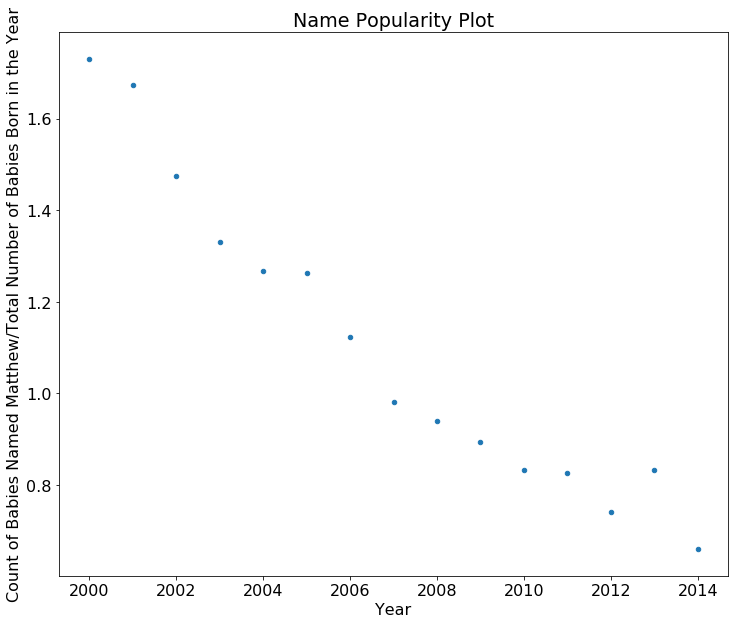

In [17]:
baby.NamePopularityPlot(name='Matthew', yearRange=(2000,2015), state='IL', sex='M')

In [522]:
male_df = combined_df[combined_df['Gender']=='M']
female_df = combined_df[combined_df['Gender']=='F']

In [20]:
combined_df.groupby(['Gender','first_name').count()

ValueError: No axis named first_name for object type <class 'type'>